<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>NLP with PyTorch</h1>
<h1>Sequence Modelling</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt 

import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras_preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.12.3

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 24.2.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

Git hash: cbc605876514759eff1e35662aa7a98f5b6e3539

keras              : 3.8.0
keras_preprocessing: 1.1.2
watermark          : 2.4.3
tensorflow         : 2.18.0
matplotlib         : 3.8.0
numpy              : 1.26.4
pandas             : 2.2.3



Load default figure style

In [3]:
plt.style.use('d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the IMDB dataset

In [4]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# SimpleRNN model

In [6]:
model = Sequential()
model.add(Embedding(top_words, 32))
## <==> ##
model.add(SimpleRNN(32))
## <==> ##
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.5519 - loss: 0.6790 - val_accuracy: 0.7682 - val_loss: 0.4976
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.8206 - loss: 0.4187 - val_accuracy: 0.8240 - val_loss: 0.4209
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.8953 - loss: 0.2604 - val_accuracy: 0.8269 - val_loss: 0.4023
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9576 - loss: 0.1302 - val_accuracy: 0.8319 - val_loss: 0.4418
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9811 - loss: 0.0677 - val_accuracy: 0.8031 - val_loss: 0.5366
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9923 - loss: 0.0352 - val_accuracy: 0.8301 - val_loss: 0.5594
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9976 - loss: 0.0153 - val_accuracy: 0.8376 - val_loss: 0.6470
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9966 - loss: 0.0154 - 

In [9]:
def plot_history(history):    
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    best_epoch = np.argmin(history.history['val_loss']) + 1
    ax_lst[0].axvline(x=best_epoch, linestyle=':', color=colors[2])
    ax_lst[0].legend()
    

    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)
    ax_lst[1].axvline(x=best_epoch, linestyle=':', color=colors[2])


    fig.tight_layout()

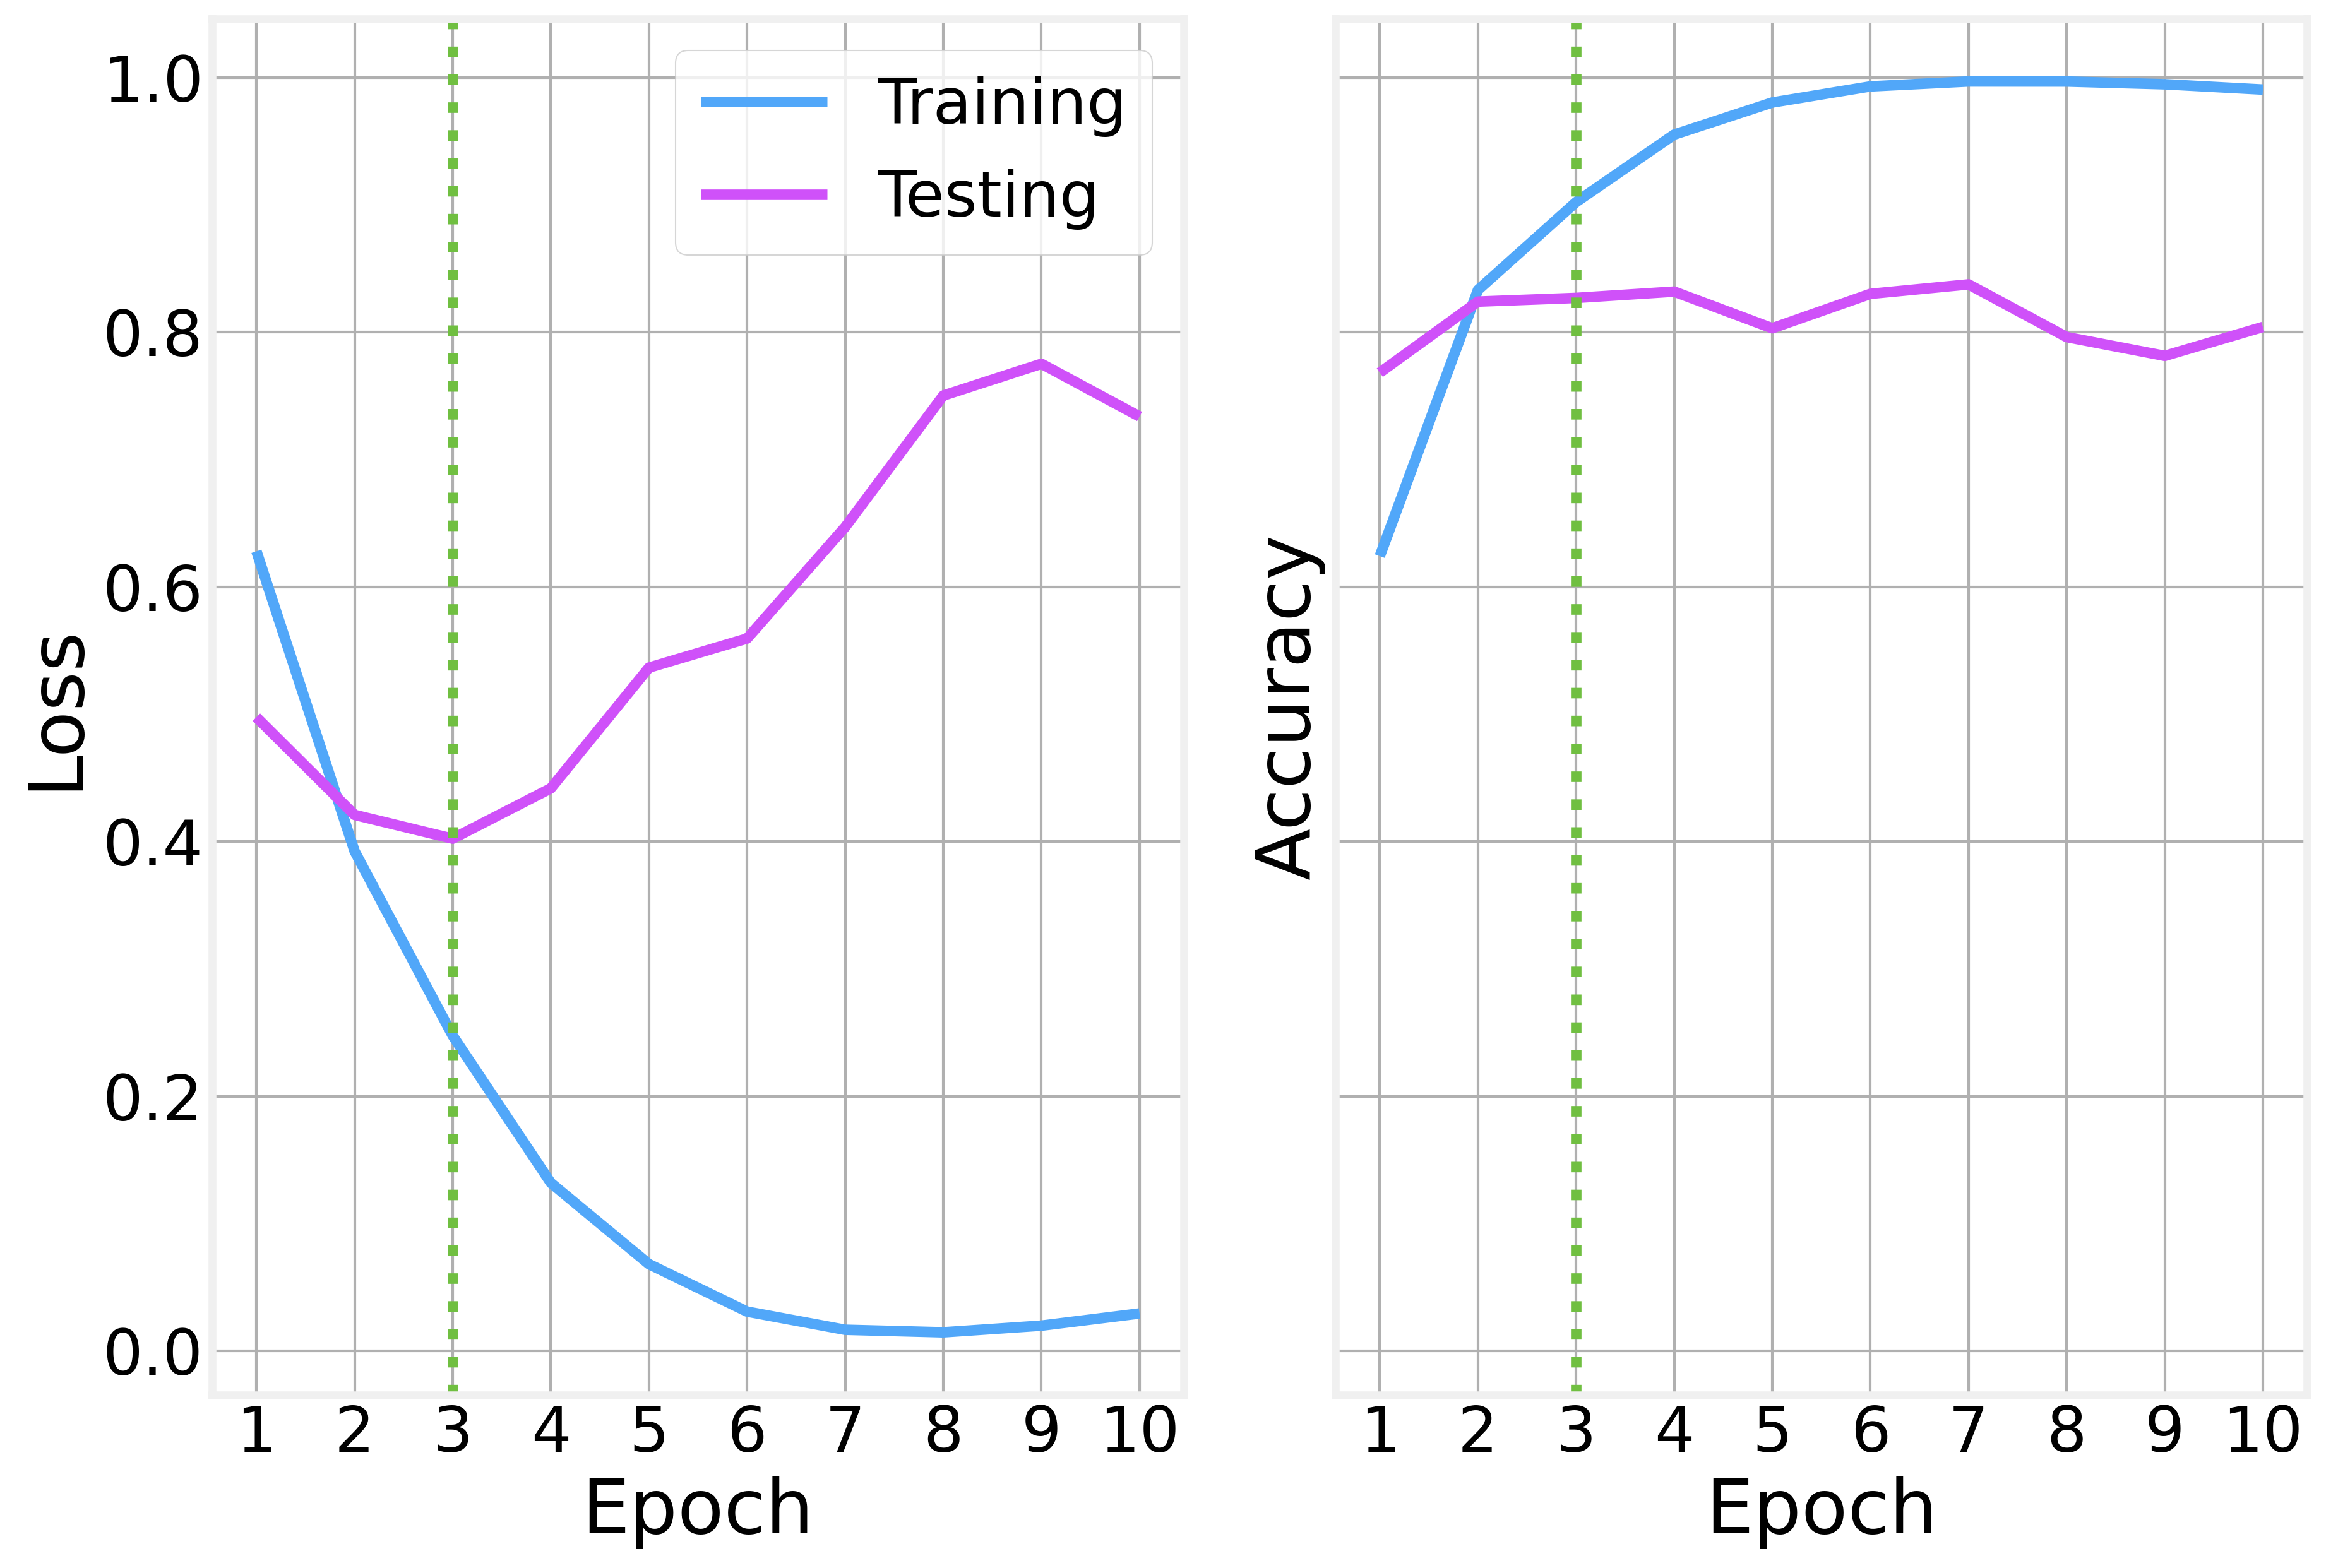

In [10]:
plot_history(history)

# GRU

In [11]:
model = Sequential()
model.add(Embedding(top_words, 32))
## <==> ##
model.add(GRU(32))
## <==> ##
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 158ms/step - accuracy: 0.6297 - loss: 0.6053 - val_accuracy: 0.8411 - val_loss: 0.3636
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 142ms/step - accuracy: 0.8865 - loss: 0.2892 - val_accuracy: 0.8670 - val_loss: 0.3206
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 153ms/step - accuracy: 0.9186 - loss: 0.2179 - val_accuracy: 0.8694 - val_loss: 0.3232
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 150ms/step - accuracy: 0.9345 - loss: 0.1804 - val_accuracy: 0.8649 - val_loss: 0.3377
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 152ms/step - accuracy: 0.9346 - loss: 0.1747 - val_accuracy: 0.8502 - val_loss: 0.3886
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 149ms/step - accuracy: 0.9519 - loss: 0.1376 - val_accuracy: 0.8645 - val_loss: 0.3812
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.9587 - loss: 0.1204 - val_accuracy: 0.8622 - val_loss: 0.4174
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 150ms/step - accuracy: 0.9686 - loss: 0

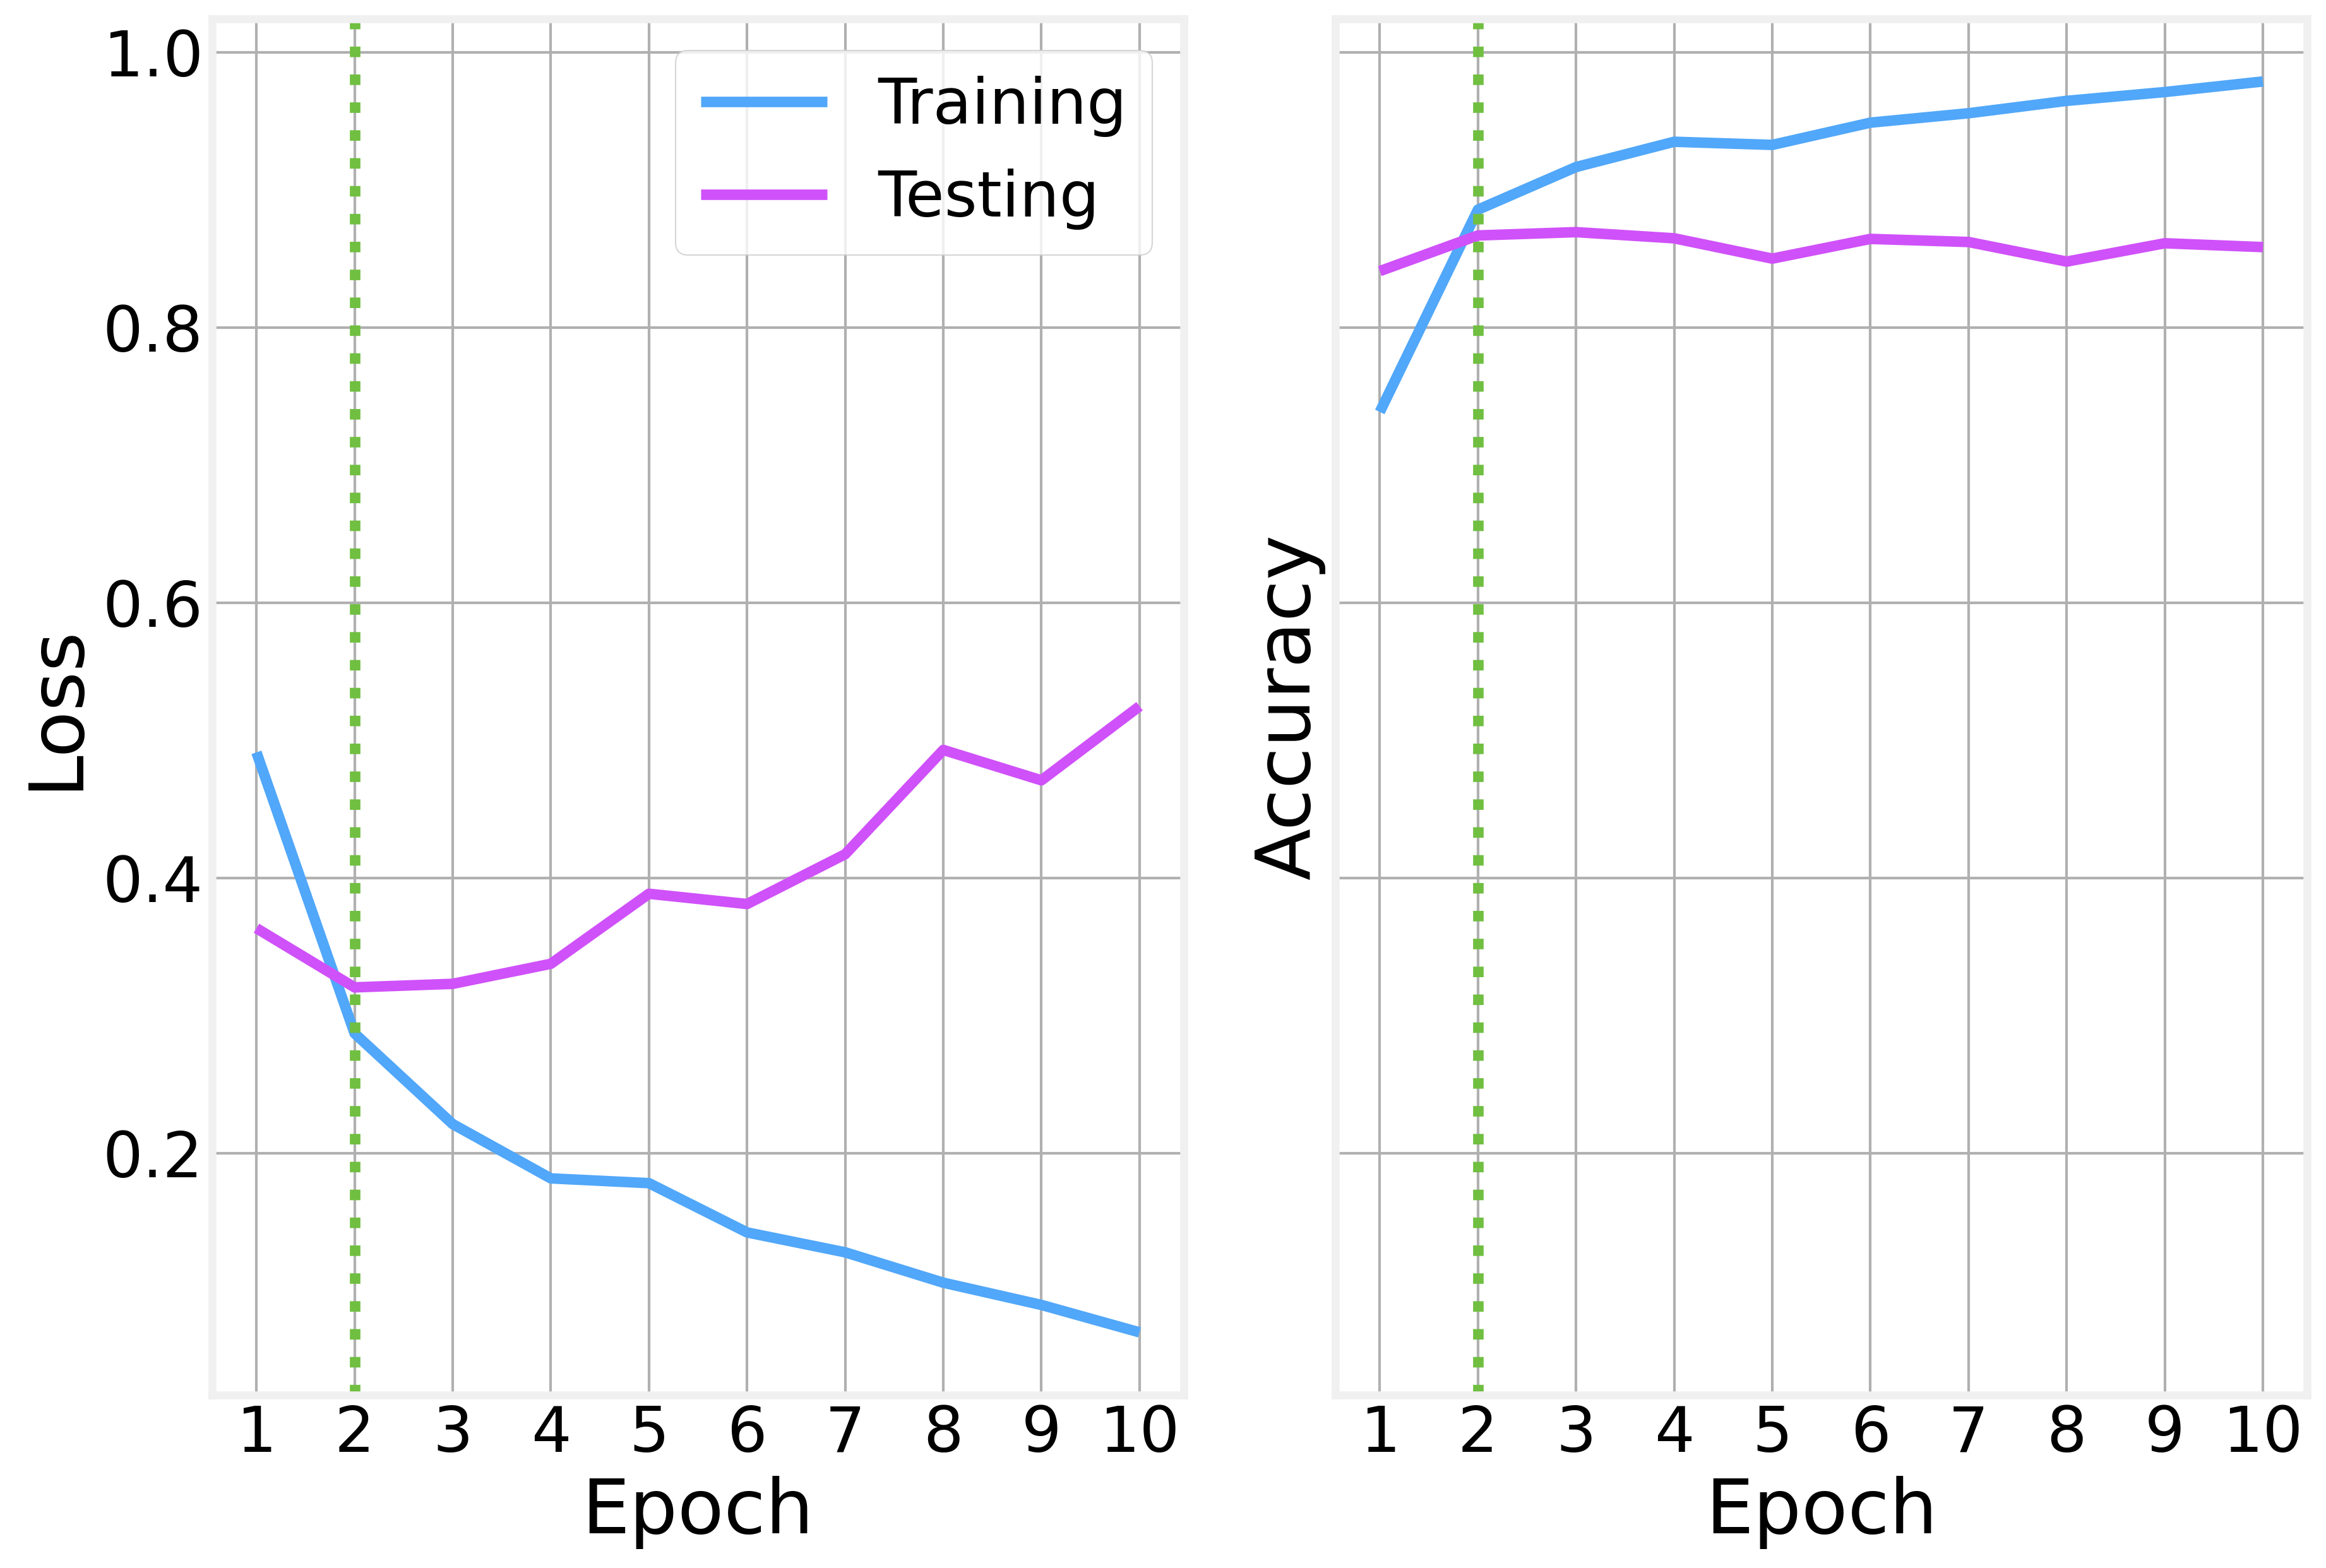

In [13]:
plot_history(history)

# LSTM

In [14]:
model = Sequential()
model.add(Embedding(top_words, 32))
## <==> ##
model.add(LSTM(32))
## <==> ##
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 164ms/step - accuracy: 0.6626 - loss: 0.6068 - val_accuracy: 0.8420 - val_loss: 0.3671
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.8716 - loss: 0.3181 - val_accuracy: 0.8365 - val_loss: 0.4046
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 210ms/step - accuracy: 0.9085 - loss: 0.2456 - val_accuracy: 0.8577 - val_loss: 0.3598
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 205ms/step - accuracy: 0.9269 - loss: 0.2012 - val_accuracy: 0.8391 - val_loss: 0.4022
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 200ms/step - accuracy: 0.9442 - loss: 0.1613 - val_accuracy: 0.8712 - val_loss: 0.3429
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 209ms/step - accuracy: 0.9551 - loss: 0.1354 - val_accuracy: 0.8607 - val_loss: 0.3872
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 205ms/step - accuracy: 0.9647 - loss: 0.1121 - val_accuracy: 0.8625 - val_loss: 0.3829
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 204ms/step - accuracy: 0.9674 - loss: 0

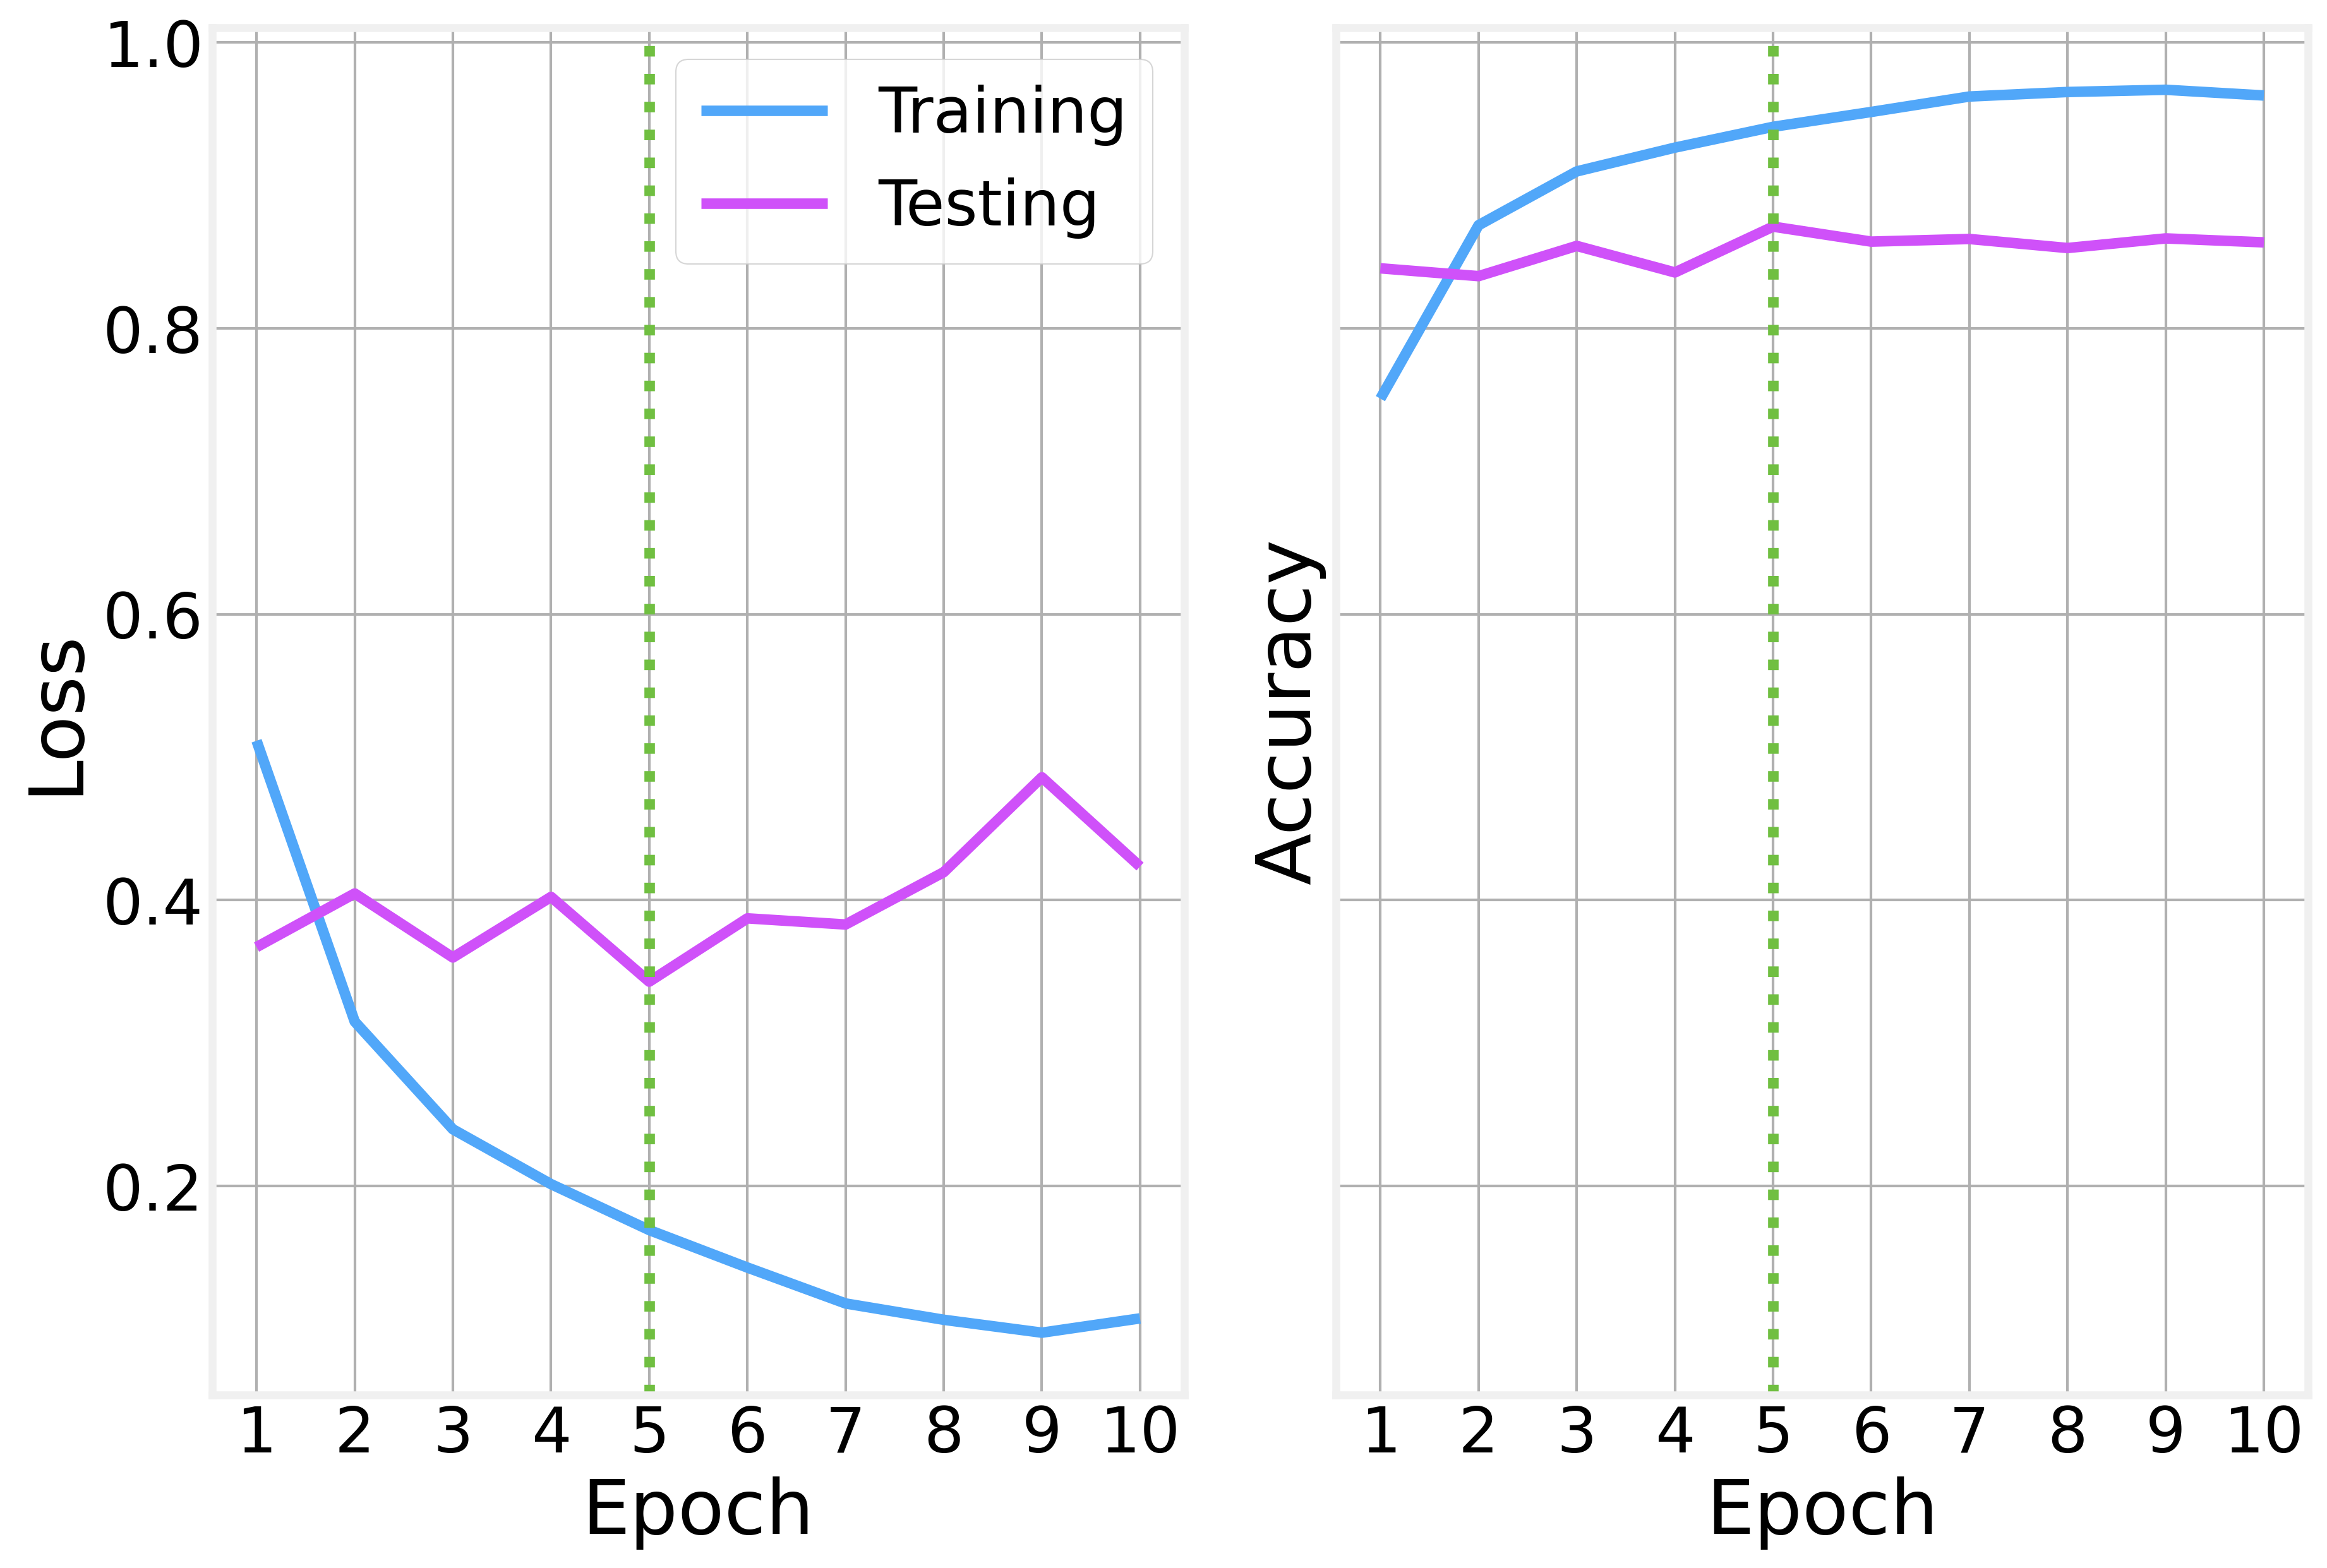

In [16]:
plot_history(history)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>